In [155]:
import numpy as np
import cv2 as cv
import cv2
import glob
import os
from matplotlib import pyplot as plt
import cv2
from matplotlib import pyplot as plt


path = "./여성_상의_청바지" #이미지 있는 경로 입력 
file_list = os.listdir(path)
file_list_png = [file for file in file_list if file.endswith(".png")] #png 파일만 불러오기


save_path = "./running_data" #저장할 폴더명을 입력하세요(폴더 자동생성) 
save_path2 = save_path + "/"
if not os.path.isdir(save_path):
    os.mkdir(save_path)


for file_list in file_list_png:
    
    image_path = path + "\\" + file_list
    img = cv2.imread(image_path)
    
    dst = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)    
    cv2.imwrite(save_path2 + file_list+".png",dst)
        


In [109]:
images = glob.glob("./test2/*.png")

for i in images:
    a = i.split("\\")
    print(a[1][:17])
    

img_4112015405_30
img_4282020119_47
img_4282020119_48
img_4285480505_15
img_4285480505_16
img_4285480505_17
img_4294928432_12
img_4317202410_1.


In [130]:
path = "./test2"
image_path = path+"\\"+image

file_list = os.listdir(path)
file_list_png = [file for file in file_list if file.endswith(".png")]

print ("file_list_py: {}".format(file_list_py))



images = glob.glob("./test2/*.png")
for image in file_list_png:
    
    image_path = path + "\\" + image
    print(image_path)

file_list_py: ['img_4112015405_30.png', 'img_4282020119_47.png', 'img_4282020119_48.png', 'img_4285480505_15.png', 'img_4285480505_16.png', 'img_4285480505_17.png', 'img_4294928432_12.png', 'img_4317202410_11.png']
./test2\img_4112015405_30.png
./test2\img_4282020119_47.png
./test2\img_4282020119_48.png
./test2\img_4285480505_15.png
./test2\img_4285480505_16.png
./test2\img_4285480505_17.png
./test2\img_4294928432_12.png
./test2\img_4317202410_11.png


In [115]:
now=os.getcwd()
save_path = now+"/runningdata"
if not os.path.isdir(save_path):
    os.mkdir(save_path)

In [101]:
os.listdir("./test2/")

['desktop.ini',
 'img_4112015405_30.png',
 'img_4282020119_47.png',
 'img_4282020119_48.png',
 'img_4285480505_15.png',
 'img_4285480505_16.png',
 'img_4285480505_17.png',
 'img_4294928432_12.png',
 'img_4317202410_11.png']

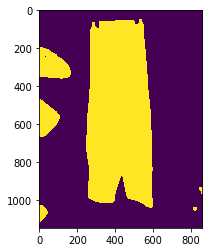

In [64]:
plt.imshow(opening)

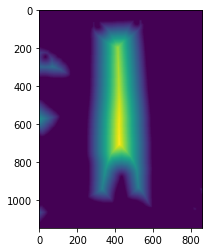

In [65]:
plt.imshow(dist_transform)

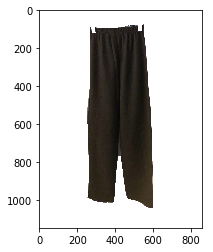

In [66]:
plt.imshow(img)

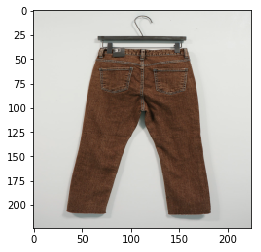

In [4]:
img = cv2.imread('2222.png')
dst = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)
plt.imshow(dst)

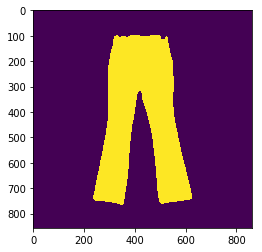

In [83]:
import numpy as np
import cv2 as cv
import cv2
from matplotlib import pyplot as plt

import cv2
from matplotlib import pyplot as plt

    
img = cv2.imread("./test2\\img_3522829405_21.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (39, 39),0)
ret, thresh = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh)


# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 5)


# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)


# Finding sure foreground area
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
result_dist_transform = cv.normalize(dist_transform, None, 255, 0, cv.NORM_MINMAX, cv.CV_8UC1)
ret, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform.max(),255, cv.THRESH_BINARY)



# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)


# Marker labelling
ret, markers = cv.connectedComponents(opening)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


markers = cv.watershed(img, markers)

#img[markers == -1] = [255, 0, 0]
img[markers == 1] = [255, 255, 255]

cv2.imwrite("ddd.png",img)
dst = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_AREA)
#cv.imshow("dist_transform", result_dist_transform)
#cv.imshow("unknown", unknown)
#cv.imshow("sure_fg", sure_fg)
#cv.imshow("sure_bg", sure_bg)
#cv.imshow("result", img)
#cv.waitKey(0)